# 여자친구 선물 워드 클라우드 만들기

In [47]:
import time 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from matplotlib import rc
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import nltk
import konlpy
from konlpy.tag import Okt
from konlpy.corpus import kobill
from wordcloud import WordCloud
from PIL import Image

### 셀레니움 활용해서 네이버 지식in 크롤링

#### 한 가지 질문에 대한 답변 가져오기

In [76]:
driver = webdriver.Chrome('../05.Crawling/chromedriver')
driver.maximize_window()
driver.get('https://www.naver.com/')
time.sleep(2)
driver.find_element_by_xpath('//*[@id="query"]').send_keys('여자친구 선물')
time.sleep(2)
driver.find_element_by_xpath('//*[@id="search_btn"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="lnb"]/div[1]/div/ul/li[4]/a').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="main_pack"]/section[1]/div/ul/li[2]/div/div[1]/div/a').click()
time.sleep(2)
driver.switch_to.window(driver.window_handles[-1]) # 새로 열린 탭으로 이동
time.sleep(2)
driver.find_element_by_xpath('//*[@id="nextPageButton"]').click() # 5개 이상 답변일 경우 더보기 버튼 누르기
time.sleep(2)
answers = driver.find_elements_by_class_name("answer-content__item._contentWrap._answer")
texts = ''
print(len(answers))
for a in answers: 
    paras = a.find_elements_by_tag_name('p')
    for p in paras:
        texts += p.text+'\n'
driver.quit()

10


#### 1페이지 질문 모두 답변 가져오기

In [77]:
driver = webdriver.Chrome('../05.Crawling/chromedriver')
driver.maximize_window()
driver.get('https://www.naver.com/')
time.sleep(2)
driver.find_element_by_xpath('//*[@id="query"]').send_keys('여자친구 선물')
time.sleep(2)
driver.find_element_by_xpath('//*[@id="search_btn"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="lnb"]/div[1]/div/ul/li[4]/a').click()
time.sleep(2)
answer_list = driver.find_elements_by_css_selector('.bx._svp_item')
time.sleep(2)
texts = ''
for i in range(1,len(answer_list)+1):
    driver.find_element_by_xpath(f'//*[@id="main_pack"]/section[1]/div/ul/li{[i]}/div/div[1]/div/a').click()
    time.sleep(2)
    driver.switch_to.window(driver.window_handles[-1]) # 새로 열린 탭으로 이동
    time.sleep(2)
    try:
        while driver.find_element_by_xpath('//*[@id="nextPageButton"]'):
            driver.find_element_by_xpath('//*[@id="nextPageButton"]').click() # 5개 이상 답변일 경우 더보기 버튼 누르기
    except:
        time.sleep(1)
    time.sleep(2)
    answers = driver.find_elements_by_class_name("answer-content__item._contentWrap._answer")
    for a in answers: 
        paras = a.find_elements_by_tag_name('p')
        for p in paras:
            texts += p.text+'\n'
    driver.switch_to.window(driver.window_handles[0]) # 질문 탭으로 이동
driver.quit()

#### 모든 페이지 크롤링

In [25]:
from tqdm import tqdm_notebook

In [35]:
driver = webdriver.Chrome('../05.Crawling/chromedriver')
driver.maximize_window()
driver.get('https://www.naver.com/')
time.sleep(2)
driver.find_element_by_xpath('//*[@id="query"]').send_keys('여자친구 선물')
time.sleep(2)
driver.find_element_by_xpath('//*[@id="search_btn"]').click()
time.sleep(2)
driver.find_element_by_xpath('//*[@id="lnb"]/div[1]/div/ul/li[4]/a').click()
time.sleep(2)
pages = driver.find_element_by_css_selector('.sc_page_inner')
a_tags = pages.find_elements_by_tag_name('a')
page_list = []
for a in a_tags:
    page_list.append(a.get_attribute('href'))
for page in tqdm_notebook(page_list):
    driver.get(page)
    time.sleep(2)
    answer_list = driver.find_elements_by_css_selector('.bx._svp_item')
    time.sleep(2)
    texts = ''
    for i in range(1,len(answer_list)+1):
        driver.find_element_by_xpath(f'//*[@id="main_pack"]/section[1]/div/ul/li{[i]}/div/div[1]/div/a').click()
        time.sleep(2)
        driver.switch_to.window(driver.window_handles[-1]) # 새로 열린 탭으로 이동
        time.sleep(2)
        try:
            while driver.find_element_by_xpath('//*[@id="nextPageButton"]'):
                driver.find_element_by_xpath('//*[@id="nextPageButton"]').click() # 5개 이상 답변일 경우 더보기 버튼 누르기
        except:
            time.sleep(1)
        time.sleep(2)
        answers = driver.find_elements_by_class_name("answer-content__item._contentWrap._answer")
        for a in answers: 
            paras = a.find_elements_by_tag_name('p')
            for p in paras:
                texts += p.text+'\n'
        driver.switch_to.window(driver.window_handles[0]) # 질문 탭으로 이동
print(texts)

무 좋지만 
여자친구분이 구매하실 수 있는 것 보다 여자친구를 생각해서 준비한 선물이여도 좋을것 같아요. 

많이 선물하시는 꽃다발 보다는 화분도 좋을것 같아요!
집에서 주기적으로 물주면서 예쁘게 필만한 꽃 화분이요^^
화분은 꽃집에서 보고 고르시면 좋을것 같아 링크 걸어두지 않았네요ㅎㅎㅎ

혹은 여성분들이 많이 사용하시는 휴족이나 메디테라피 힐링패치같은거
힐링패치는 가격이 좀 있거든요. 근데 밤에 잘때만 하고 자면 되는데
정말 쉬원해요. 링크 걸어뒀어요! 아니면 휴족시간이라고 올리브영에서 파는 제품들도 있어요. 
https://meditherapy.co.kr/product/detail.html?product_no=33&utm_source=sa&utm_medium=bsa&utm_campaign=healingpatch_p&utm_content=200728_regular&utm_term=title&NaPm=ct%3Dkdk9tz7c%7Cci%3D0zi0001Vk2PtEv8gc124%7Ctr%3Dbrnd%7Chk%3Deb230a6d76045a30a020ea1a81e1b1215922b232
다리 피로 안녕!
meditherapy.co.kr


30대면 직장인이시니깐 긴장하거나 예민할때 그럴때 어깨가 뭉치잖아요?
어깨 안마기 같은것도 좋을것 같아요! 어깨 푸는데 혼자서 하기에 정말 제격입니다.
링크 걸어뒀어요! 
https://smartstore.naver.com/zespa/products/535951016?NaPm=ct%3Dkdk9unw8%7Cci%3Db21a31a6ac7e1ce2966022be36f1ab53df10c91e%7Ctr%3Dslsbrc%7Csn%3D187924%7Cic%3D%7Chk%3D556f0bba2aa5583a19303323df08c8109bab80ca
[제스파] 건강용품 전문쇼핑몰, 제스파
smartstore.naver.com

혹은 이미 많은 여성분들이 하나쯤 갖고 계실 다리 안마기도 정말 좋아요! 
메디테라피에 안마기면 최고의 조합인것 같아요ㅎㅎ

In [75]:
f = open("./result/present_text.txt", 'w',encoding='utf8')
f.write(texts)
f.close()

### 크롤링 결과 바탕으로 워드 클라우드 그리기

In [38]:
okt = Okt()
tokens_ko = okt.nouns(texts)
tokens_ko[:10]

['비공개', '답변', '진짜', '정도', '가방', '여자', '라면', '가방', '선물', '때']

In [40]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

3270
816


In [41]:
# 빈도수 상위 100개
ko = nltk.Text(tokens_ko, name='여자친구 선물')
ko.vocab().most_common(100)

[('답변', 199),
 ('선물', 111),
 ('때', 71),
 ('참고', 62),
 ('위', 60),
 ('작성자', 57),
 ('지식', 57),
 ('포인트', 57),
 ('경험', 56),
 ('바탕', 56),
 ('작성', 56),
 ('내용', 56),
 ('추천', 53),
 ('여자친구', 35),
 ('상품', 28),
 ('비공개', 27),
 ('목걸이', 27),
 ('것', 27),
 ('가격', 25),
 ('수', 24),
 ('제품', 22),
 ('무드등', 22),
 ('사진', 20),
 ('더', 18),
 ('구매', 18),
 ('피부', 17),
 ('저', 17),
 ('화장품', 16),
 ('향수', 14),
 ('네이버', 14),
 ('꽃', 14),
 ('통해', 13),
 ('거', 13),
 ('제', 12),
 ('선택', 12),
 ('제공', 12),
 ('파트너', 12),
 ('스', 12),
 ('수수료', 12),
 ('나', 12),
 ('디자인', 11),
 ('브랜드', 11),
 ('활동', 11),
 ('맞춤', 11),
 ('정말', 11),
 ('쇼핑몰', 11),
 ('스타일', 11),
 ('등', 11),
 ('판매', 10),
 ('여성', 10),
 ('열심', 10),
 ('향기', 10),
 ('케이스', 10),
 ('액세서리', 10),
 ('가방', 9),
 ('여자', 9),
 ('라면', 9),
 ('요즘', 9),
 ('한번', 9),
 ('고민', 9),
 ('향', 9),
 ('귀걸이', 9),
 ('요', 8),
 ('가지', 8),
 ('사이트', 8),
 ('가성', 8),
 ('비', 8),
 ('경우', 8),
 ('악세사리', 8),
 ('이', 8),
 ('핸드', 8),
 ('정액', 8),
 ('주얼리', 8),
 ('전', 8),
 ('페이', 8),
 ('끈', 7),
 ('부담', 7),
 ('조금', 7),
 ('

In [82]:
# 뺄 단어 정하기

stop_words = ['답변','때','참고','위','작성자','지식','포인트','경험','바탕','작성','내용','비공개','것','가격','수','더','피부','저','네이버','통해','거','제','제공','파트너','스','수수료','나','활동','맞춤','정말','등','판매','라면','요즘','한번','고민','요','가지','가성','비','경우','이','정액','전','페이','조금','하바','리움','구성','개','더욱','곳','건','남','하나','정도','보시','뭐','용','분','샵','쿠팡','중','안','밀란','채택','대도','쿠론','번','도','여기','이상','또한','아래','때문','링크','로','바로','질문','혹시','운동','포함','팩','다리','알','매장','비교','세상','인스타','님','프로필','동영상','팔로우','게시','물','등등','문의','펠레','좀','살','찌','해','톡','배송비','무료','금액','다음','고래','꼬리','그냥','템','홍보','니','루','초','길이','부분','대로','조정','대부분','종이','용이','내','인스타그램','쉐어','줄','일리','만큼','데','개별','무척','공부','수익','관리','번은','다른','녀석','올인원','그','해피빈','신지','주시','토드','이면','필','족','피','또','주기','이용','리','클라이너','나이','를','소개','자','센트','선물','추천','여자친구','상품','착용','배송','택배','장바구니','제품','선택','구매','맘마','유','방치','고요','팔지','그것','예','냄새','안나','너','유도','파드너스','일환','충전','히든','적립금','방법','결제','강남','고속버스','지하상가','폭','순','보기','듯','신고','미쁜']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자친구 선물')
ko.vocab().most_common(50)

[('목걸이', 27),
 ('무드등', 22),
 ('사진', 20),
 ('화장품', 16),
 ('향수', 14),
 ('꽃', 14),
 ('디자인', 11),
 ('브랜드', 11),
 ('쇼핑몰', 11),
 ('스타일', 11),
 ('여성', 10),
 ('열심', 10),
 ('향기', 10),
 ('케이스', 10),
 ('액세서리', 10),
 ('가방', 9),
 ('여자', 9),
 ('향', 9),
 ('귀걸이', 9),
 ('사이트', 8),
 ('악세사리', 8),
 ('핸드', 8),
 ('주얼리', 8),
 ('끈', 7),
 ('부담', 7),
 ('팔찌', 7),
 ('시간', 7),
 ('폰', 7),
 ('유행', 6),
 ('포장', 6),
 ('사용', 6),
 ('실용', 6),
 ('생각', 6),
 ('유니크', 6),
 ('손', 6),
 ('색상', 6),
 ('기념일', 6),
 ('제작', 6),
 ('사람', 6),
 ('슬리퍼', 6),
 ('센스', 5),
 ('곱창', 5),
 ('머리', 5),
 ('각인', 5),
 ('기능', 5),
 ('후기', 5),
 ('꽃집', 5),
 ('신발', 5),
 ('시', 5),
 ('연인', 5)]

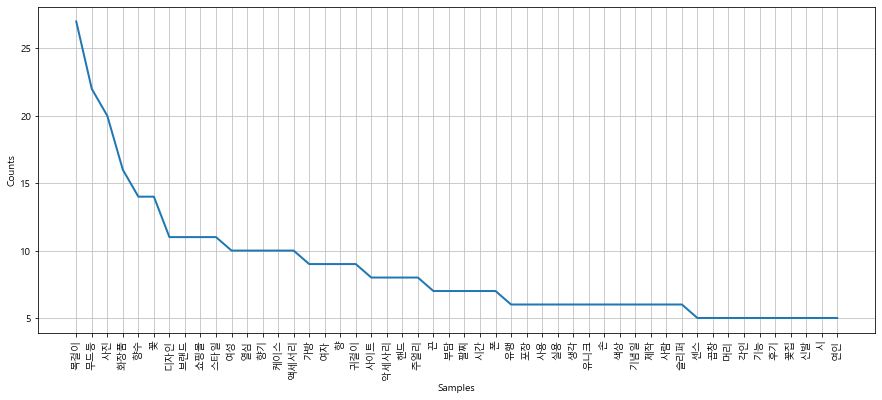

In [83]:
# 빈도수 그래프
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

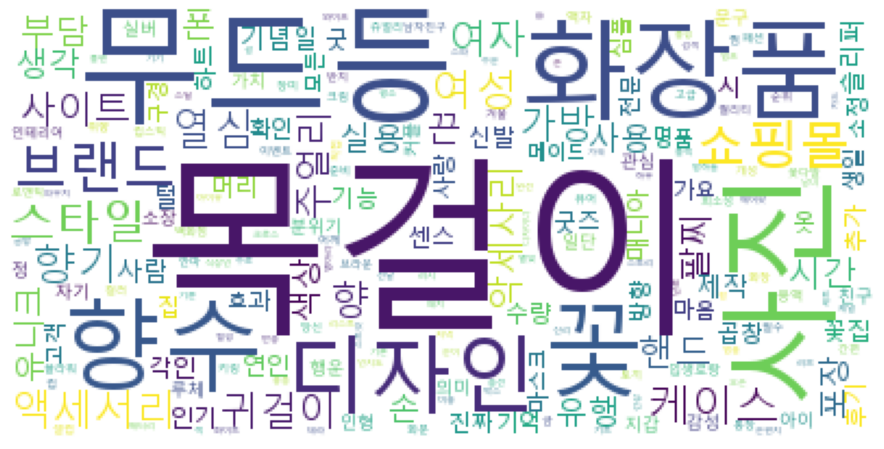

In [84]:
# 일반적인 클라우드
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                        relative_scaling=0.5,
                        background_color='white',
                        ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [85]:
mask = np.array(Image.open('./data/heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

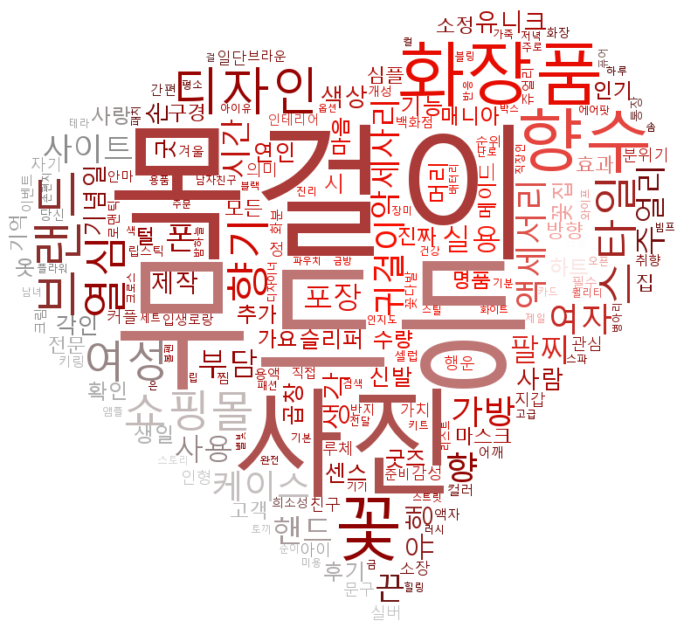

In [86]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                        relative_scaling=0.1,mask=mask,
                        background_color='white',
                        ).generate_from_frequencies(dict(data))
default_colors = wordcloud.to_array()
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()